# Advance Regression Assignment - House Pricing

## Importing the Required libraries

In [656]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [657]:
# Supressing the warnings

import warnings 
warnings.filterwarnings('ignore')

## Reading the data.


In [658]:
housing=pd.read_csv("C:/Users/Arindam/Downloads/train.csv")

### Understanding the dataframe

In [659]:
housing.shape

(1460, 81)

In [660]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [661]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [662]:
round(housing.isnull().sum()/len(housing)*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [663]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [664]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [665]:
housing.shape

(1460, 81)

In [666]:
housing=housing.drop(['Id','LotFrontage'],axis=1)

In [667]:
(round(housing.isnull().sum()/len(housing)*100,2)).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
                 ...  
SaleCondition     0.00
HeatingQC         0.00
Heating           0.00
TotalBsmtSF       0.00
MSSubClass        0.00
Length: 79, dtype: float64

In [668]:
housing.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Analysing and imputing missing values

In [669]:
housing['GarageYrBlt']. replace (np.NaN, housing['GarageYrBlt'].median(), inplace=True)

In [670]:
housing['MasVnrArea']. replace (np.NaN, housing['MasVnrArea'].median(), inplace=True)

In [671]:
null_df=["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", 
         "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [672]:
for i in null_df:
    housing[i].fillna("none",inplace=True)

In [673]:
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## EDA

## UNIVARIATE ANALYSIS

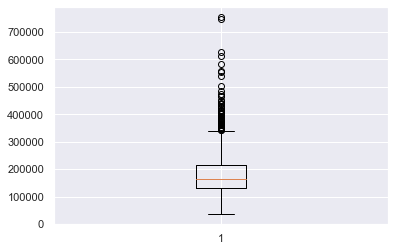

In [674]:
plt.boxplot(housing['SalePrice'])
plt.show()

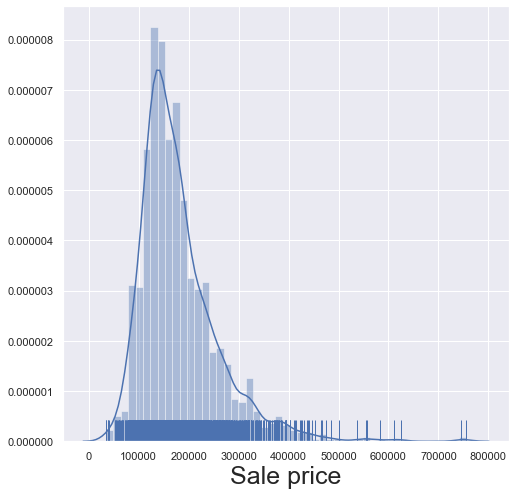

In [675]:
plt.figure(figsize=(8,8))
sns.distplot(housing['SalePrice'],rug=True)
plt.xlabel("Sale price",fontsize=25)
plt.show()

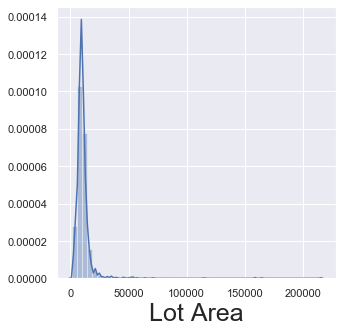

maximum homes have 10516.83  sq ft size


In [676]:
plt.figure(figsize=(5,5))
sns.distplot(housing['LotArea'])
plt.xlabel("Lot Area",fontsize=25)
plt.show()
print("maximum homes have",round(housing['LotArea'].mean(),2)," sq ft size")

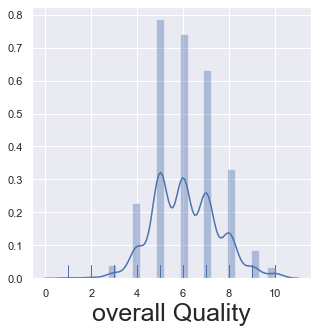

In [677]:
plt.figure(figsize=(5,5))
sns.distplot(housing['OverallQual'],rug=True)
plt.xlabel("overall Quality",fontsize=25)
plt.show()

## max homes have average condition overall

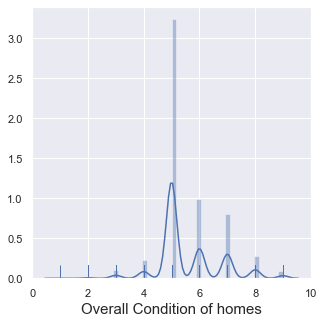

In [678]:
plt.figure(figsize=(5,5))
sns.distplot(housing['OverallCond'],rug=True)
plt.xlabel("Overall Condition of homes",fontsize=15)
plt.show()

## Maximum have avg condition.

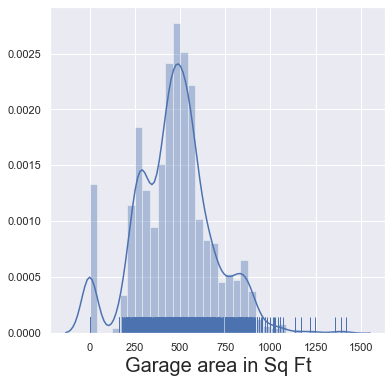

In [679]:
plt.figure(figsize=(6,6))
sns.distplot(housing['GarageArea'],rug=True)
plt.xlabel("Garage area in Sq Ft",fontsize=20)
plt.show()

No handles with labels found to put in legend.


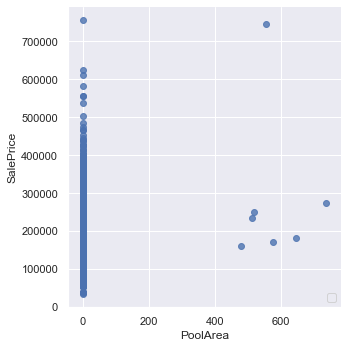

In [680]:
sns.lmplot(x='PoolArea', y='SalePrice', data=housing, fit_reg=False,legend=False)
plt.legend(loc='lower right')


## max price is for homes with street  of 50-150 ft connected to them.

No handles with labels found to put in legend.


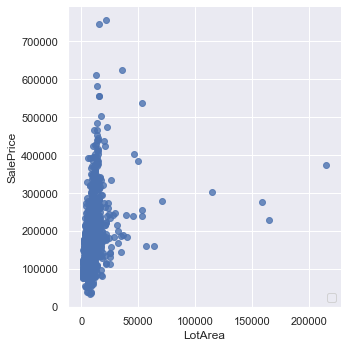

In [681]:
sns.lmplot(x='LotArea', y='SalePrice', data=housing, fit_reg=False,legend=False)
plt.legend(loc='lower right')


No handles with labels found to put in legend.


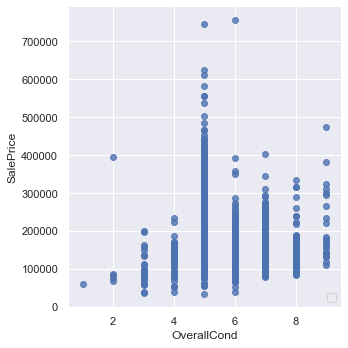

In [682]:
sns.lmplot(x='OverallCond', y='SalePrice', data=housing ,fit_reg=False,legend=False)
plt.legend(loc='lower right')


No handles with labels found to put in legend.


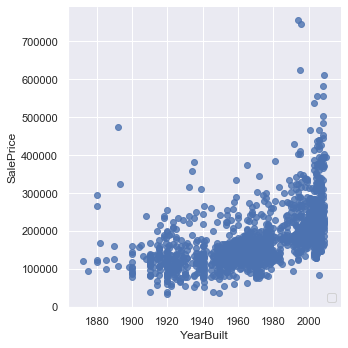

In [683]:
sns.lmplot(x='YearBuilt', y='SalePrice', data=housing ,fit_reg=False,legend=False)
plt.legend(loc='lower right')


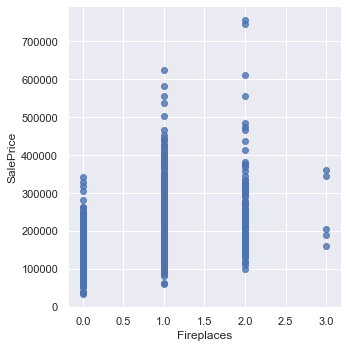

In [684]:
sns.lmplot(x='Fireplaces', y='SalePrice', data=housing ,fit_reg=False,legend=False)



## Homes with 2 fireplaces score the most when it comes to price.

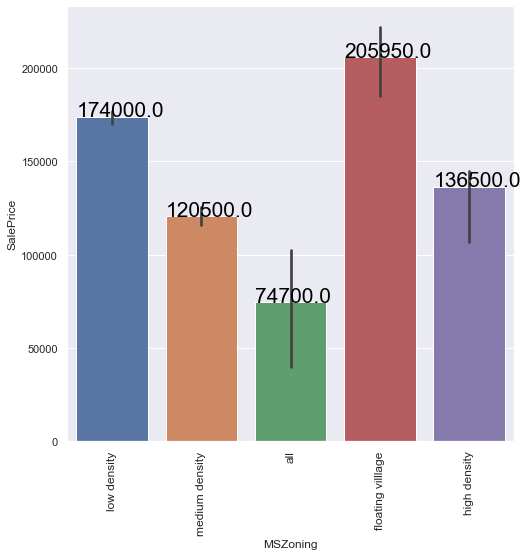

In [685]:
plt.figure(figsize=(8,8))
fig1=sns.barplot(x='MSZoning',y='SalePrice',estimator=np.median,data= housing)
fig1.set_xticklabels(['low density','medium density','all','floating villlage','high density' ],rotation=90,fontsize=12)
for i in fig1.patches:
    # get_x pulls left or right; get_height pushes up or down
    fig1.text(i.get_x()+.00, i.get_height()+120, \
            str(round((i.get_height()), 0)), fontsize=21, color='black',
                rotation=0)
plt.show()

## Floating villages are most expensive.

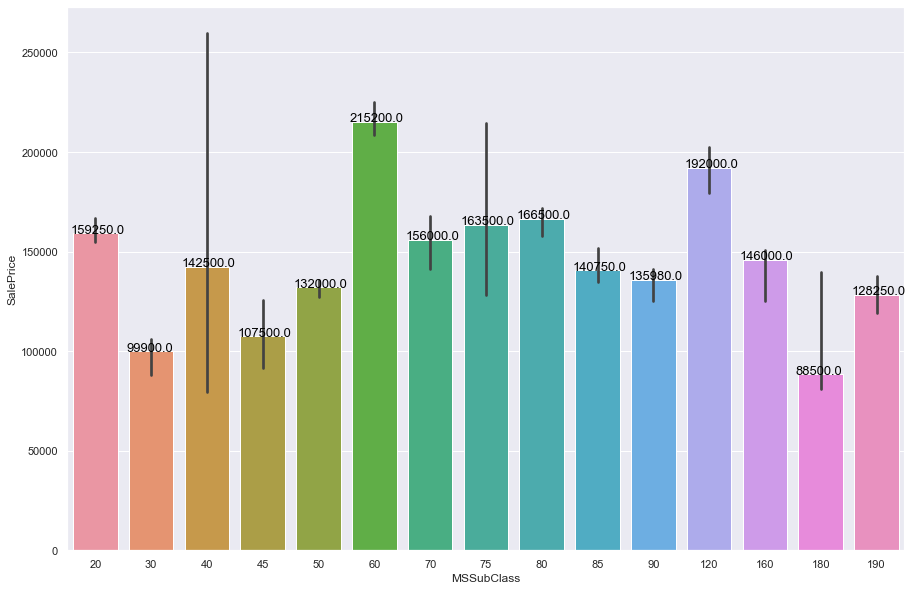

In [686]:
plt.figure(figsize=(15,10))
fig2=sns.barplot(x='MSSubClass',y='SalePrice',estimator=np.median,data= housing)
for i in fig2.patches:
    # get_x pulls left or right; get_height pushes up or down
    fig2.text(i.get_x()-.05, i.get_height()+0, \
            str(round((i.get_height()), 0)), fontsize=13, color='black',
                rotation=0)
plt.show()

## 2 storey 1946 and newer are the most expensive homes.

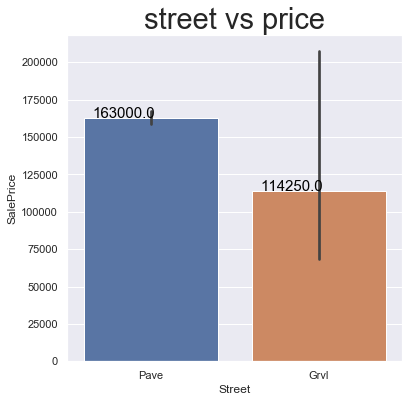

In [687]:
plt.figure(figsize=(6,6))
fig3=sns.barplot(x='Street',y='SalePrice',estimator=np.median,data= housing)
plt.title("street vs price",fontsize=29)
for i in fig3.patches:
    # get_x pulls left or right; get_height pushes up or down
    fig3.text(i.get_x()+.05, i.get_height()+0, \
            str(round((i.get_height()), 0)), fontsize=15, color='black',
                rotation=0)


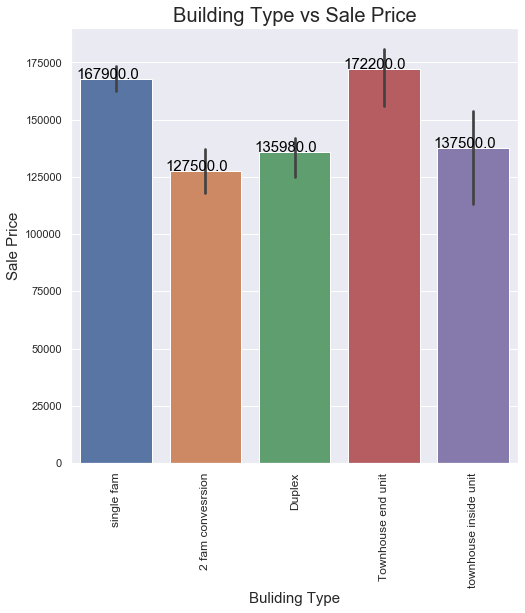

In [688]:
plt.figure(figsize=(8,8))
fig3=sns.barplot(x='BldgType',y='SalePrice',estimator=np.median,data= housing)
fig3.set_xticklabels(['single fam','2 fam convesrsion','Duplex','Townhouse end unit','townhouse inside unit' ],rotation=90,fontsize=12)
plt.xlabel("Buliding Type",fontsize=15)
plt.ylabel("Sale Price",fontsize=15)
plt.title("Building Type vs Sale Price",fontsize=20)
for i in fig3.patches:
    # get_x pulls left or right; get_height pushes up or down
    fig3.text(i.get_x()-.05, i.get_height()+0, \
            str(round((i.get_height()), 0)), fontsize=15, color='black',
                rotation=0)
plt.show()

## Townhouse end units homes are most expensive.

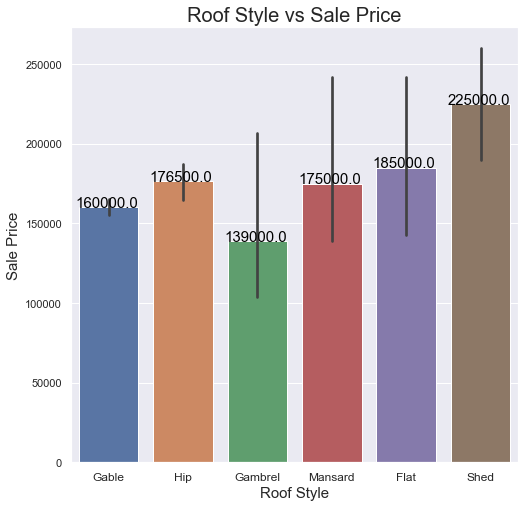

In [689]:
plt.figure(figsize=(8,8))
fig4=sns.barplot(x='RoofStyle',y='SalePrice',estimator=np.median,data= housing)
plt.xticks(fontsize=12)
plt.xlabel("Roof Style",fontsize=15)
plt.ylabel("Sale Price",fontsize=15)
plt.title("Roof Style vs Sale Price",fontsize=20)
for i in fig4.patches:
    # get_x pulls left or right; get_height pushes up or down
    fig4.text(i.get_x()-.05, i.get_height()+0, \
            str(round((i.get_height()), 0)), fontsize=15, color='black',
                rotation=0)
plt.show()

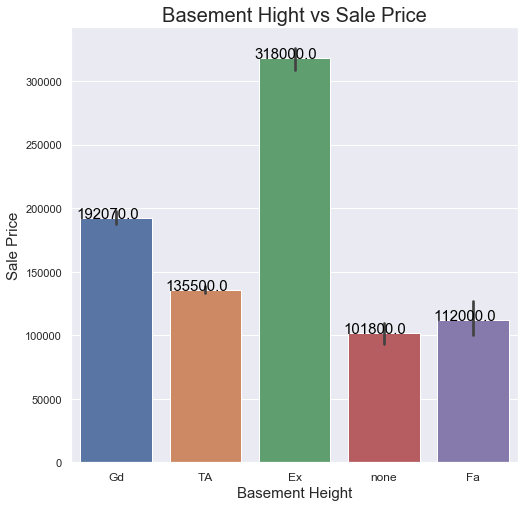

In [690]:
plt.figure(figsize=(8,8))
fig5=sns.barplot(x='BsmtQual',y='SalePrice',estimator=np.median,data= housing)
plt.xticks(fontsize=12)
plt.xlabel("Basement Height",fontsize=15)
plt.ylabel("Sale Price",fontsize=15)
plt.title("Basement Hight vs Sale Price",fontsize=20)
for i in fig5.patches:
    # get_x pulls left or right; get_height pushes up or down
    fig5.text(i.get_x()-.05, i.get_height()+0, \
            str(round((i.get_height()), 0)), fontsize=15, color='black',
                rotation=0)
plt.show()

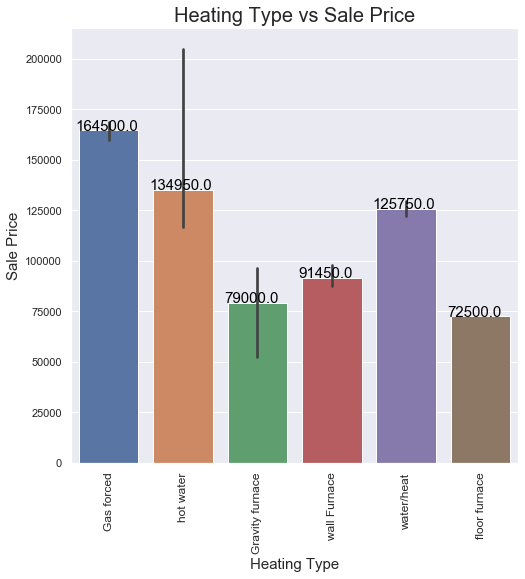

In [691]:
plt.figure(figsize=(8,8))
fig6=sns.barplot(x='Heating',y='SalePrice',estimator=np.median,data= housing)
fig6.set_xticklabels(['Gas forced','hot water','Gravity furnace','wall Furnace','water/heat','floor furnace' ],rotation=90,fontsize=12)

plt.xticks(fontsize=12)
plt.xlabel("Heating Type",fontsize=15)
plt.ylabel("Sale Price",fontsize=15)
plt.title("Heating Type vs Sale Price",fontsize=20)
for i in fig6.patches:
    # get_x pulls left or right; get_height pushes up or down
    fig6.text(i.get_x()-.05, i.get_height()+0, \
            str(round((i.get_height()), 0)), fontsize=15, color='black',
                rotation=0)
plt.show()

## Homes which use  forced  gas warm air furnace type of heating  are the most expensive.

# Examinig numerical features.

In [692]:
numeric_cols=housing.select_dtypes(include=[np.number])
numeric_cols.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


## Finding Missing values.

In [693]:
total=numeric_cols.isnull().sum().sort_values(ascending=False)
percent=round(((numeric_cols.isnull().sum()/housing.shape[0])*100),2).sort_values(ascending=False)
missing=pd.concat([total,percent], axis=1, join='outer', keys=['Total Missing Values','% of Missing data'])
missing.index.name='features'
missing.head(10)

,Total Missing Values,% of Missing data
features,,
SalePrice,0,0.0
YrSold,0,0.0
BsmtFullBath,0,0.0
GrLivArea,0,0.0
LowQualFinSF,0,0.0
2ndFlrSF,0,0.0
1stFlrSF,0,0.0
TotalBsmtSF,0,0.0
BsmtUnfSF,0,0.0


## Examinig unique values.

In [694]:
numeric_cols.apply(pd.Series.nunique)

MSSubClass         15
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
MasVnrArea        327
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       12
Fireplaces          4
GarageYrBlt        97
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SalePrice         663
dtype: int64

In [695]:
numeric_cols=numeric_cols.loc[:,numeric_cols.nunique()!=1]


## Examining categorical features.

In [696]:
categ_cols=housing.select_dtypes(include=[np.object])
categ_cols.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
1,RL,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
2,RL,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
3,RL,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,none,none,none,WD,Abnorml
4,RL,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal


## Finding missing values.

In [697]:
total=categ_cols.isnull().sum().sort_values(ascending=False)
percent=round(((categ_cols.isnull().sum()/housing.shape[0])*100),2).sort_values(ascending=False)
missing_cat=pd.concat([total,percent], axis=1, join='outer', keys=['Total Missing Values','% of Missing data'])
missing_cat.index.name='features'
missing_cat.head(10)


,Total Missing Values,% of Missing data
features,,
MasVnrType,8,0.55
Electrical,1,0.07
SaleCondition,0,0.00
Foundation,0,0.00
ExterQual,0,0.00
Exterior2nd,0,0.00
Exterior1st,0,0.00
RoofMatl,0,0.00
RoofStyle,0,0.00


In [698]:
housing['PoolQC'].fillna('none',inplace=True)

## Finding unique values.

In [699]:
categ_cols.apply(pd.Series.nunique)

MSZoning          5
Street            2
Alley             3
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
PoolQC            4
Fence             5
MiscFeature       5
SaleType          9
SaleCondition     6
dtype: int64

## Analysing correlations with target variable.

In [700]:
correl=numeric_cols.corr()
print(correl['SalePrice'].sort_values(ascending=False,),'\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64 




## Plotting heatmap for correlations.

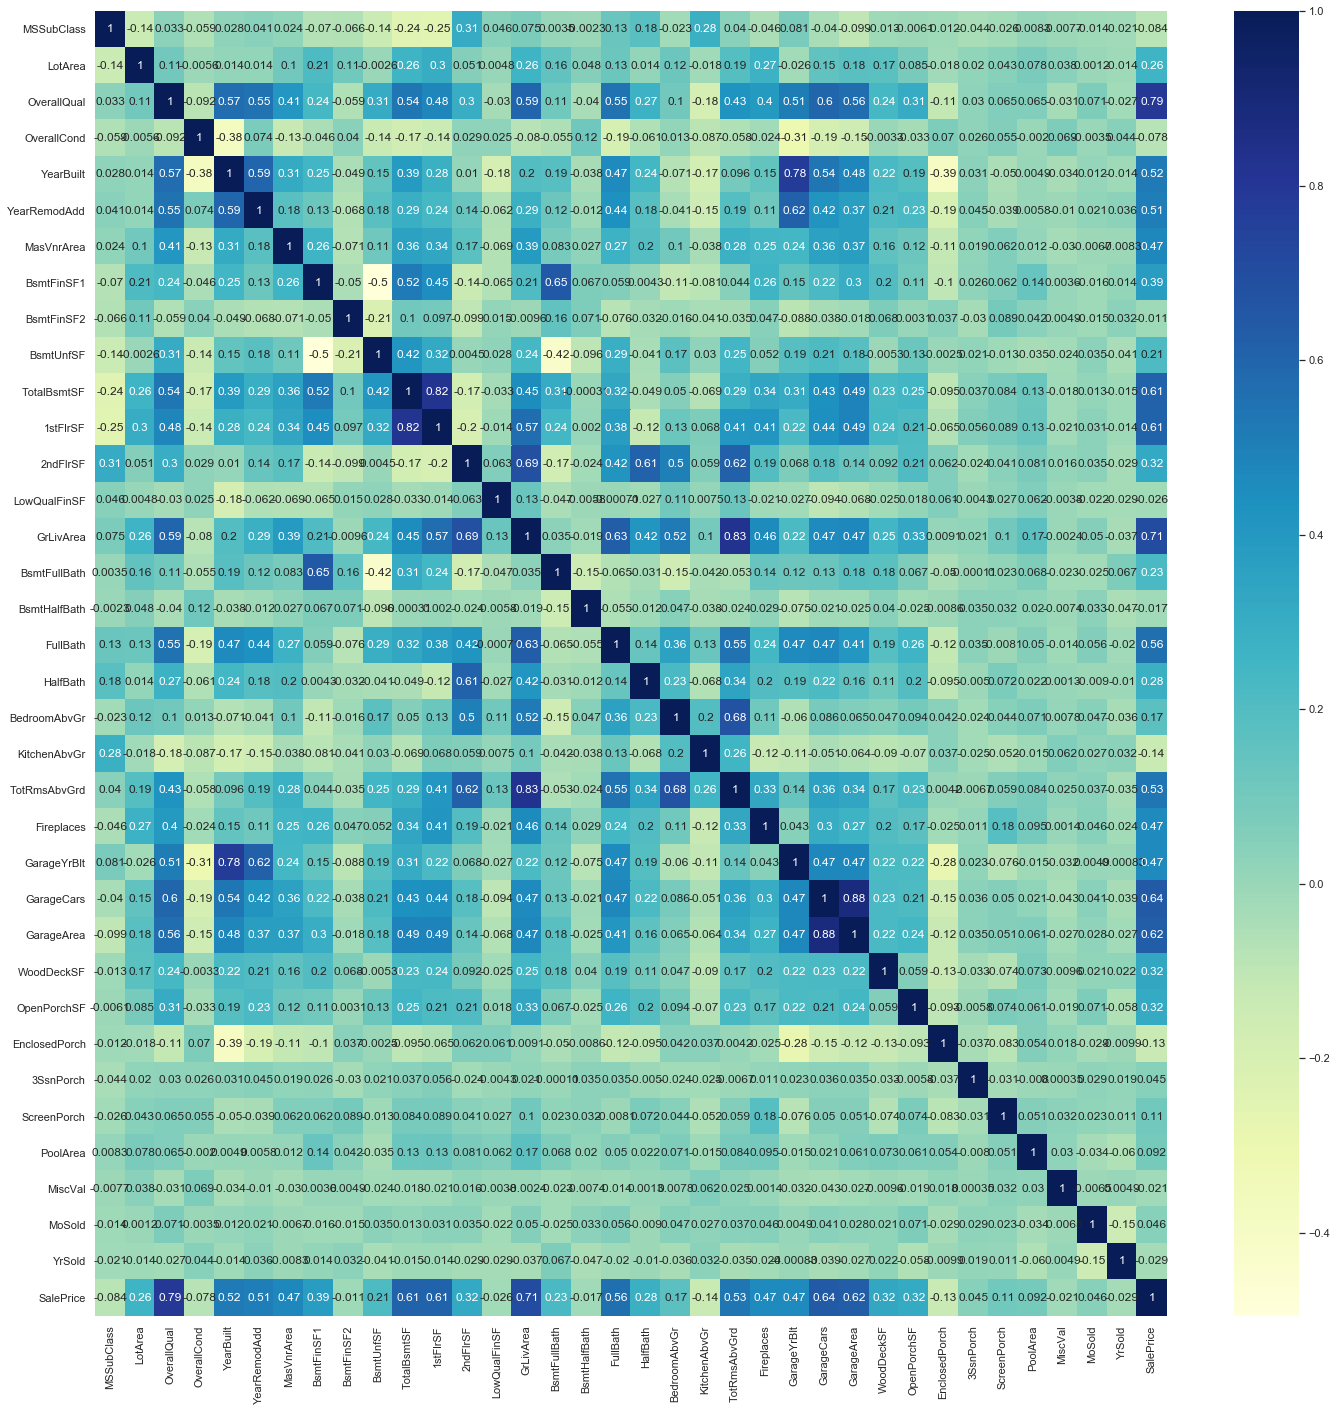

In [701]:
plt.figure(figsize=(24,24))
corrmat=housing.corr()
sns.heatmap(corrmat,cmap='YlGnBu',annot=True)
plt.show()

## Zoomed Heatmap.

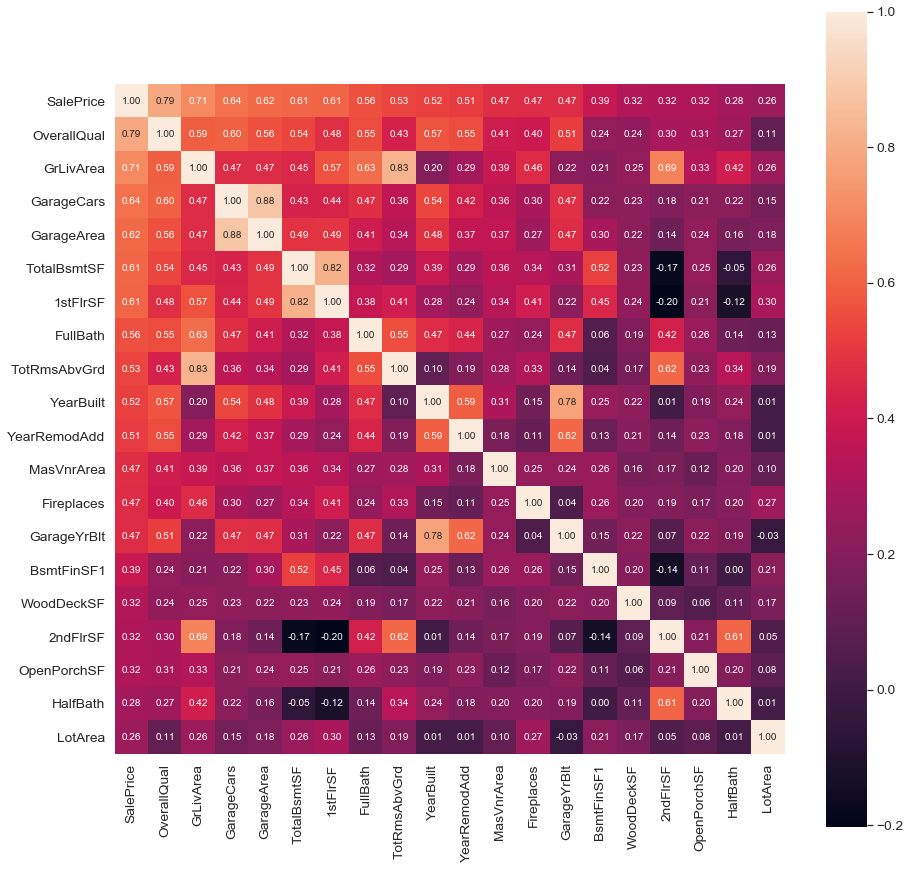

In [702]:
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
plt.figure(figsize=(15,15))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## It is evident from here that columns 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt' are highly  correlated with 'Sale Price'.

# Pairplots and scatter plots with highly correlated coulmns.

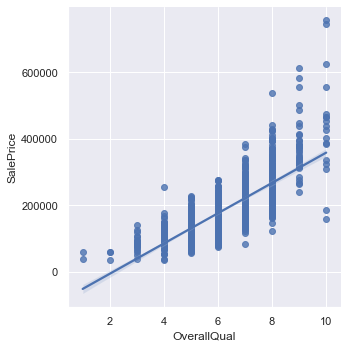

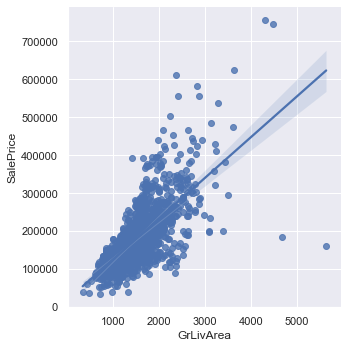

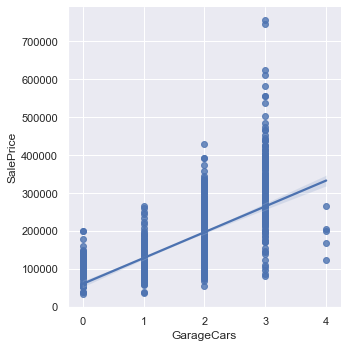

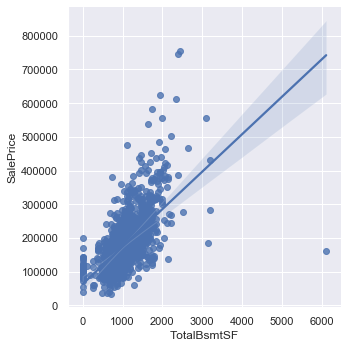

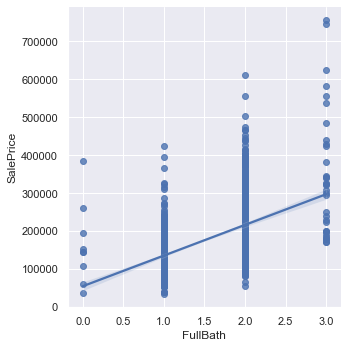

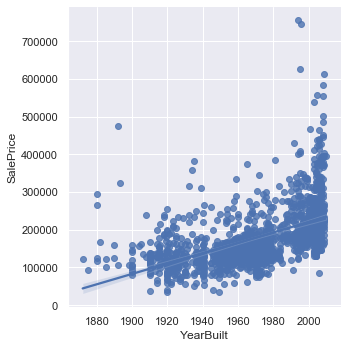

In [703]:
sns.set()
colz = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
for col in colz:
    sns.lmplot(col,'SalePrice',data=housing)
plt.show()

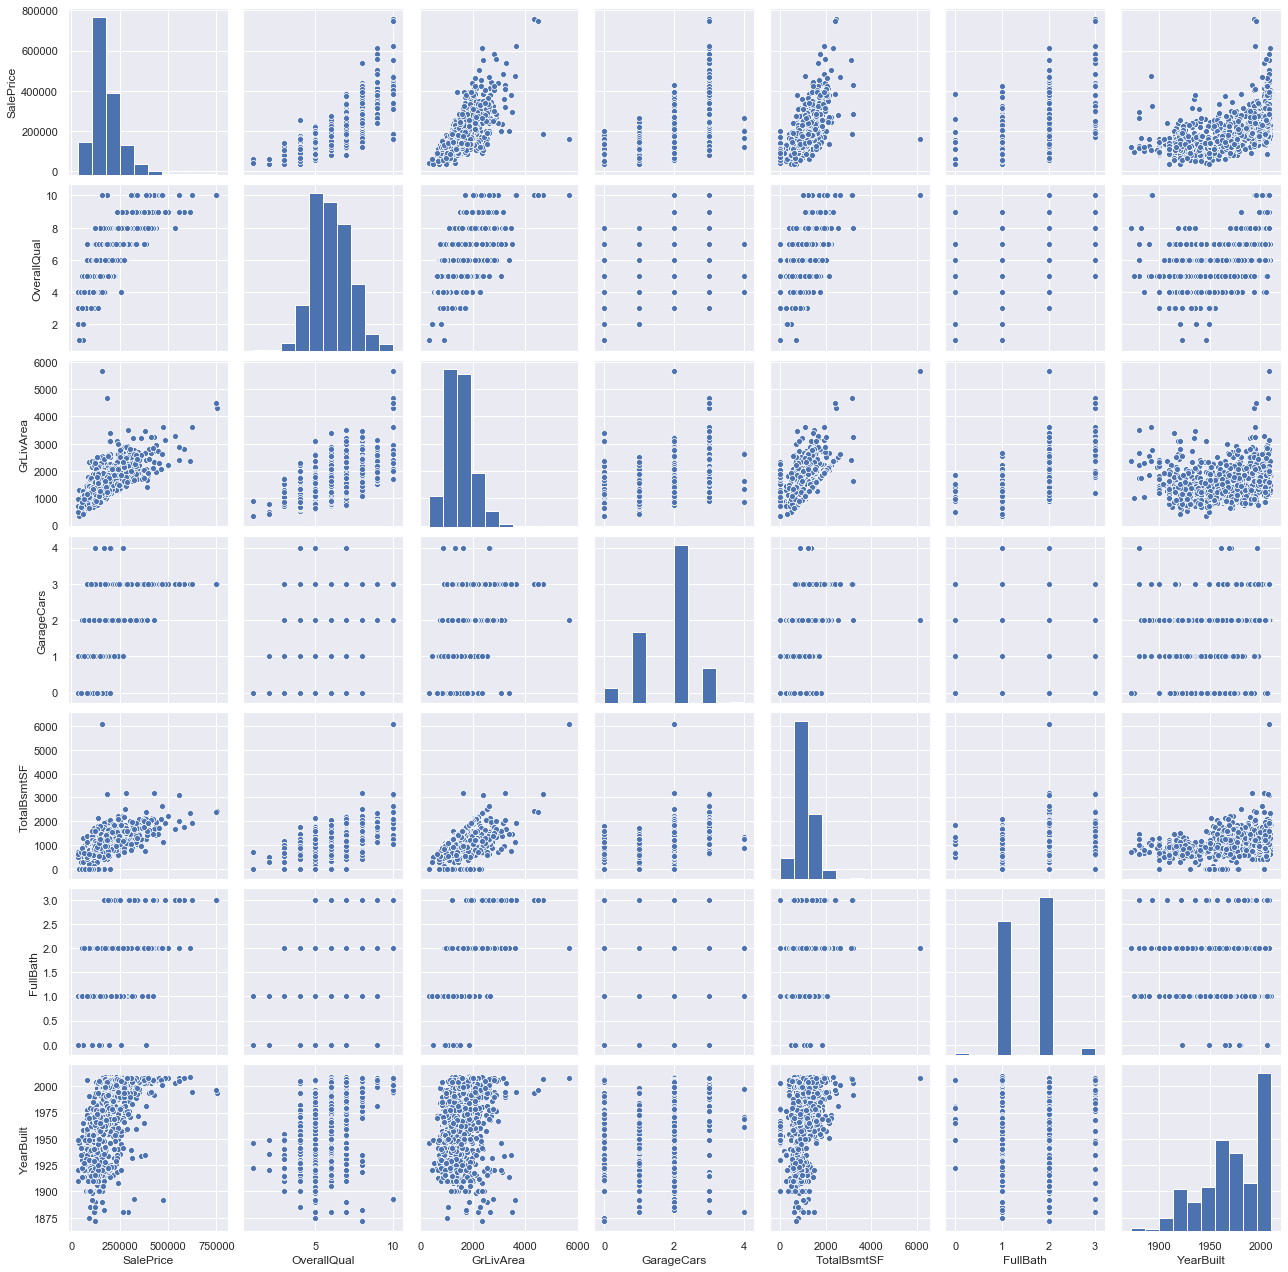

In [704]:
sns.set()
columns=['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(housing[columns])
plt.show()

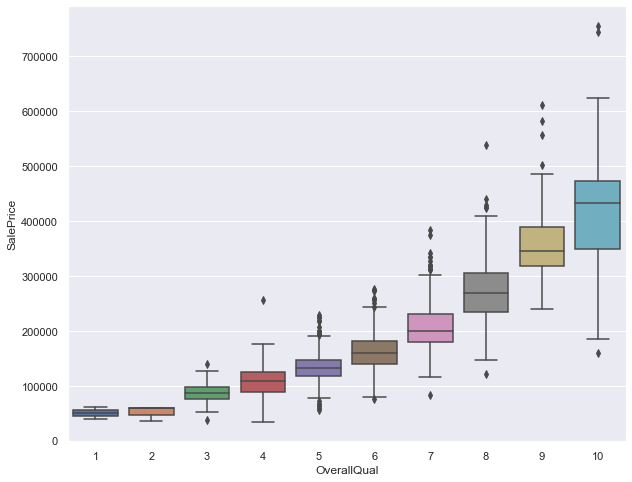

In [705]:
plt.figure(figsize=(10,8))
sns.boxplot(x='OverallQual',y='SalePrice',data=housing)
plt.show()

#####  clearly a positive correlation exists between sale price and overall quality

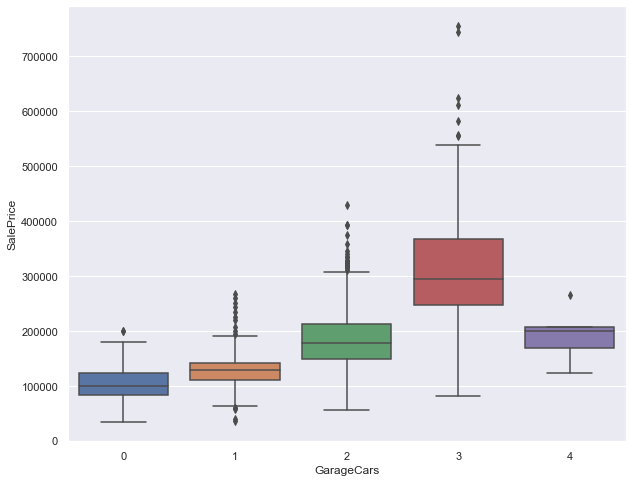

In [706]:
plt.figure(figsize=(10,8))
sns.boxplot(x='GarageCars',y='SalePrice',data=housing)
plt.show()

## Removing Outliers.

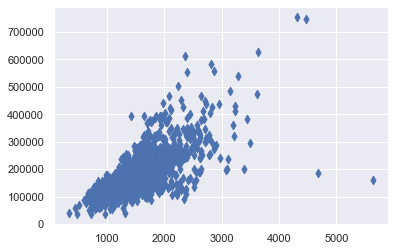

In [707]:
plt.scatter(housing.GrLivArea,housing.SalePrice,c='b',marker='d')
plt.show()

In [708]:
housing=housing[housing['GrLivArea']<4000]

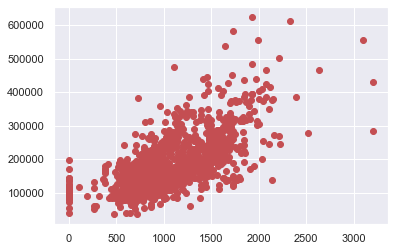

In [709]:
plt.scatter(housing.TotalBsmtSF ,housing.SalePrice,c='r',marker='o')
plt.show()

In [710]:
housing=housing[housing.TotalBsmtSF<3000]

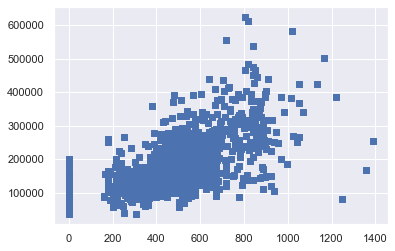

In [711]:
plt.scatter(housing.GarageArea ,housing.SalePrice,c='b',marker='s')
plt.show()

In [712]:
housing=housing[housing['GarageArea']<1200]

In [713]:
housing.shape

(1449, 79)

In [714]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1449 non-null   int64  
 1   MSZoning       1449 non-null   object 
 2   LotArea        1449 non-null   int64  
 3   Street         1449 non-null   object 
 4   Alley          1449 non-null   object 
 5   LotShape       1449 non-null   object 
 6   LandContour    1449 non-null   object 
 7   Utilities      1449 non-null   object 
 8   LotConfig      1449 non-null   object 
 9   LandSlope      1449 non-null   object 
 10  Neighborhood   1449 non-null   object 
 11  Condition1     1449 non-null   object 
 12  Condition2     1449 non-null   object 
 13  BldgType       1449 non-null   object 
 14  HouseStyle     1449 non-null   object 
 15  OverallQual    1449 non-null   int64  
 16  OverallCond    1449 non-null   int64  
 17  YearBuilt      1449 non-null   int64  
 18  YearRemo

## probablity and normal probablity plot for Sale Price.

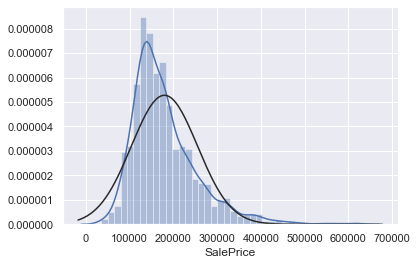

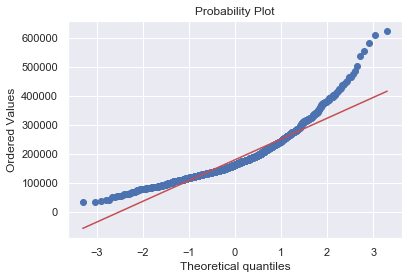

In [715]:
sns.distplot(housing['SalePrice'],fit=norm)
fig=plt.figure()
res=stats.probplot(housing['SalePrice'], plot=plt)

### It can be seen here that the sale price column is not normally distributed,so transforming it before regression.

In [716]:
housing['SalePrice']=np.log(housing['SalePrice'])

## Tranformed histogram and  Probablity plot for sale price.

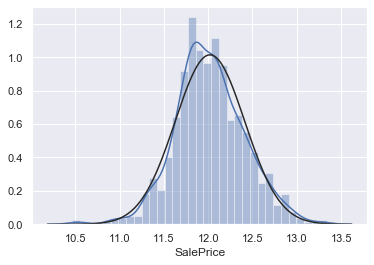

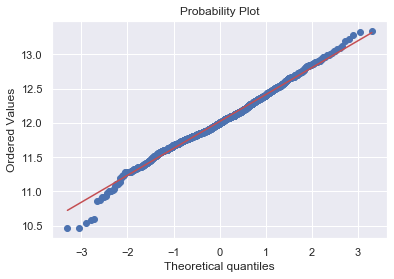

In [717]:
sns.distplot(housing['SalePrice'],fit=norm)
fig=plt.figure()
res=stats.probplot(housing['SalePrice'], plot=plt)

## repeating it for other variables.

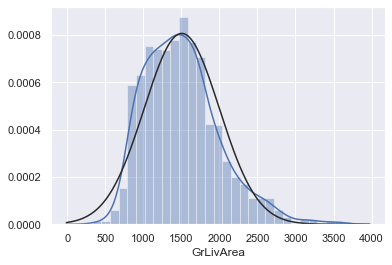

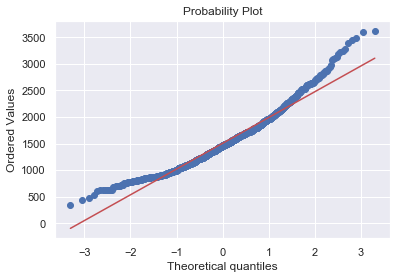

In [718]:
sns.distplot(housing['GrLivArea'],fit=norm)
fig=plt.figure()
res=stats.probplot(housing['GrLivArea'], plot=plt)

In [719]:
housing['GrLivArea']=np.log(housing['GrLivArea'])

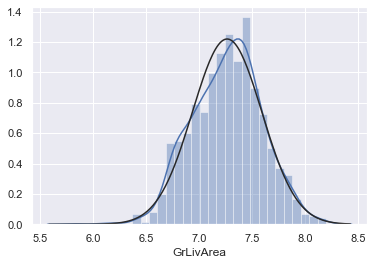

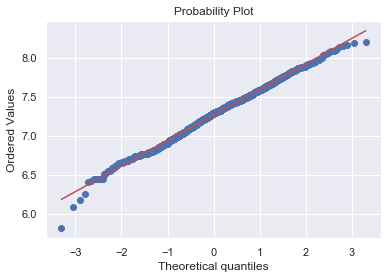

In [720]:
sns.distplot(housing['GrLivArea'],fit=norm)
fig=plt.figure()
res=stats.probplot(housing['GrLivArea'], plot=plt)

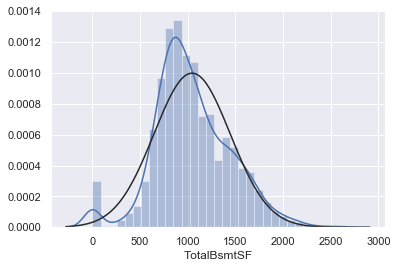

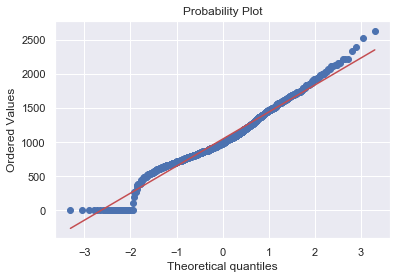

In [721]:
sns.distplot(housing['TotalBsmtSF'],fit=norm)
fig=plt.figure()
res=stats.probplot(housing['TotalBsmtSF'], plot=plt)

#### Replacing 0 with the average value ,because as 0 wont let us do the logarithmic transformation.

In [722]:
housing['TotalBsmtSF']=housing['TotalBsmtSF'].replace(0,np.average(housing['TotalBsmtSF']))

In [723]:
housing['TotalBsmtSF']=np.log(housing['TotalBsmtSF'])

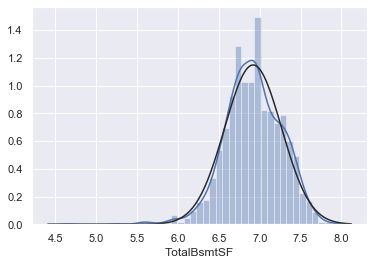

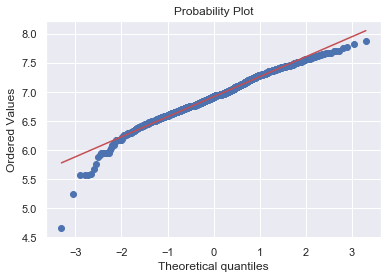

In [724]:
sns.distplot(housing['TotalBsmtSF'],fit=norm)
fig=plt.figure()
res=stats.probplot(housing['TotalBsmtSF'], plot=plt)

In [725]:
housing.shape

(1449, 79)

In [726]:
housing1=housing.copy()

## Data  Preparation.

In [727]:
Y=housing.pop('SalePrice')
X=housing

In [728]:
## creating dummy variables for categorical variables.
housing_cat=X.select_dtypes(include=['object'])
housing_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
1,RL,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
2,RL,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
3,RL,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,none,none,none,WD,Abnorml
4,RL,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal


In [729]:
# transforming into dummy variables.
housing_dummy=pd.get_dummies(housing_cat, drop_first=True)
housing_dummy.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,Alley_none,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [730]:
X=X.drop(list(housing_cat.columns),axis=1)

In [731]:
## concating X and housing_dummy
X=pd.concat([X,housing_dummy],axis=1)

In [732]:
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


## Scaling the features.

In [733]:
from sklearn.preprocessing import scale
kols=X.columns
X=pd.DataFrame(scale(X))
X.columns=kols
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=256)

In [734]:
## Split into train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

## Model Building and Evaluations.

## Ridge and Lasso Regression.

In [735]:
## list of alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge=Ridge()
## Cross validation
folds=5
model_cv= GridSearchCV(estimator=ridge, param_grid=params ,scoring='neg_mean_absolute_error',
                       cv=folds,return_train_score=True,verbose=1)
model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [736]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results=cv_results[cv_results['param_alpha'] <=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019588,0.001624,0.003198,0.000400,0.0001,{'alpha': 0.0001},-0.095668,-0.086667,-0.093878,-0.098176,...,-0.092464,0.004451,27,-0.057040,-0.059949,-0.056480,-0.056236,-0.059337,-0.057808,0.001533
1,0.018988,0.000632,0.003398,0.000490,0.001,{'alpha': 0.001},-0.095667,-0.086664,-0.093872,-0.098175,...,-0.092460,0.004452,26,-0.057040,-0.059950,-0.056479,-0.056237,-0.059337,-0.057808,0.001533
2,0.016190,0.001937,0.003000,0.000895,0.01,{'alpha': 0.01},-0.095647,-0.086638,-0.093818,-0.098159,...,-0.092422,0.004464,25,-0.057038,-0.059952,-0.056478,-0.056240,-0.059338,-0.057809,0.001533
3,0.017189,0.001324,0.002998,0.000632,0.05,{'alpha': 0.05},-0.095566,-0.086526,-0.093584,-0.098090,...,-0.092264,0.004510,24,-0.057033,-0.059964,-0.056474,-0.056260,-0.059343,-0.057815,0.001535
4,0.016790,0.001599,0.002599,0.000800,0.1,{'alpha': 0.1},-0.095474,-0.086411,-0.093304,-0.098008,...,-0.092089,0.004553,23,-0.057026,-0.059977,-0.056478,-0.056285,-0.059349,-0.057823,0.001535


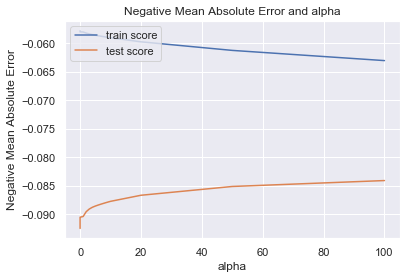

In [737]:
## plotting mean test and train score for aplha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [738]:
model_cv.best_score_

-0.08407353719211141

In [739]:
model_cv.best_params_

{'alpha': 100}

In [740]:
## Optimal value for alpha is 100 for ridge
alpha=100
ridge=Ridge(alpha)
ridge.fit(x_train,y_train)
ridge.coef_

array([-7.35549816e-03,  2.15369542e-02,  5.20560173e-02,  3.76225631e-02,
        2.28954787e-02,  1.91338693e-02,  8.00161012e-03,  2.40775550e-02,
        4.04343337e-03,  7.21368859e-05,  3.30058923e-02,  3.48419618e-02,
        3.00691675e-02,  7.81053789e-03,  5.42697524e-02,  8.77588197e-03,
       -2.80091606e-03,  1.60784985e-02,  1.22938226e-02, -3.44273340e-03,
       -1.41704481e-02,  1.63878265e-02,  1.35781298e-02,  9.19675604e-03,
        2.08097845e-02,  2.19955260e-02,  9.35900084e-03,  1.10578034e-02,
        3.19042091e-03,  5.38541604e-03,  1.17585644e-02,  2.33129250e-03,
        2.48976573e-03, -2.06884999e-03, -9.34827707e-04,  7.38156918e-03,
        8.39190344e-03,  2.00837675e-02,  3.01230627e-03,  1.00852733e-02,
        1.38780487e-03,  1.44207047e-03,  3.17497266e-03,  1.94686729e-03,
       -2.68076562e-04,  1.31532648e-03, -5.07952964e-03,  1.67333574e-03,
       -2.69794434e-32,  5.05191009e-03, -4.58950363e-03, -1.86835637e-03,
       -7.44217058e-03,  

#### ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

In [741]:
main_coef_ridge=pd.Series(ridge.coef_,index=x_train.columns)
var_selected= sum(ridge.coef_!=0)
print("the num of feautes selected by ridge : ",var_selected)

the num of feautes selected by ridge :  255


In [742]:
main_features_ridge=pd.concat([main_coef_ridge.sort_values(ascending=False).head(10),main_coef_ridge.sort_values(ascending=False).tail(10)])
main_features_ridge

GrLivArea               0.054270
OverallQual             0.052056
OverallCond             0.037623
1stFlrSF                0.034842
TotalBsmtSF             0.033006
2ndFlrSF                0.030069
BsmtFinSF1              0.024078
SaleCondition_Normal    0.023119
CentralAir_Y            0.023038
YearBuilt               0.022895
Neighborhood_Edwards   -0.011764
HeatingQC_TA           -0.013713
KitchenAbvGr           -0.014170
BsmtQual_TA            -0.014526
Neighborhood_MeadowV   -0.014749
KitchenQual_Gd         -0.015506
BsmtQual_Gd            -0.015508
Functional_Maj2        -0.015554
Heating_Grav           -0.017418
KitchenQual_TA         -0.017774
dtype: float64

In [743]:
## predictions
y_train_pred=ridge.predict(x_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred=ridge.predict(x_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))


0.947625787783842
0.8992550377187744


### r2 score is good for both train and test data  so clearly no overfitting.

### For Subjective Question

###### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

### Checking the effect on Ridge if the value of the alpha is doubled from before 

If the Value of Alpha is doubled

In [744]:
alpha_r=200
ridge1=Ridge(alpha_r)
ridge1.fit(x_train,y_train)
ridge1.coef_

array([-6.89061874e-03,  1.93519209e-02,  4.76917131e-02,  3.29906778e-02,
        1.73318963e-02,  1.99881882e-02,  9.06977767e-03,  2.33351783e-02,
        3.73488572e-03,  1.24487782e-03,  3.02136129e-02,  3.35574926e-02,
        2.35819480e-02,  6.48921476e-03,  4.66784087e-02,  8.85999258e-03,
       -2.68288275e-03,  1.64717782e-02,  1.30051435e-02, -8.61915483e-04,
       -1.21255154e-02,  1.90777697e-02,  1.38897309e-02,  9.43479863e-03,
        2.03849860e-02,  2.27928130e-02,  9.24459159e-03,  1.20154791e-02,
        1.96185817e-03,  4.97768823e-03,  1.12247914e-02,  2.71994358e-03,
        2.34081182e-03, -1.51641965e-03, -5.43112240e-04,  5.54051339e-03,
        6.27214693e-03,  1.46776983e-02, -2.60515349e-03,  9.12200985e-03,
        1.46070035e-03,  1.80348474e-03,  3.17307687e-03,  1.97734000e-03,
       -1.52212088e-03,  2.20102353e-03, -3.73617937e-03,  1.29716529e-03,
       -1.36728569e-32,  5.54538266e-03, -4.28599722e-03, -1.47610181e-03,
       -6.72598480e-03,  

In [745]:
## predictions
y_train_pred1=ridge1.predict(x_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred1))
y_test_pred1=ridge1.predict(x_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred1))


0.943583823233938
0.8992766698307472


In [746]:
main_coef_ridge1=pd.Series(ridge1.coef_,index=x_train.columns)
var_selected11= sum(ridge1.coef_!=0)
print("the num of feautes selected by rifge : ",var_selected11)

the num of feautes selected by rifge :  255


In [747]:
main_features_ridge1=pd.concat([main_coef_ridge1.sort_values(ascending=False).head(10),main_coef_ridge1.sort_values(ascending=False).tail(10)])
main_features_ridge1

OverallQual             0.047692
GrLivArea               0.046678
1stFlrSF                0.033557
OverallCond             0.032991
TotalBsmtSF             0.030214
2ndFlrSF                0.023582
BsmtFinSF1              0.023335
GarageArea              0.022793
CentralAir_Y            0.021283
GarageCars              0.020385
Neighborhood_IDOTRR    -0.010372
KitchenQual_Gd         -0.010970
BsmtQual_Gd            -0.011288
KitchenAbvGr           -0.012126
BsmtQual_TA            -0.013020
HeatingQC_TA           -0.013374
Neighborhood_MeadowV   -0.014528
Functional_Maj2        -0.014835
KitchenQual_TA         -0.014985
Heating_Grav           -0.015456
dtype: float64

Not much difference can be seen in the R2 score

## LASSO regression.

In [748]:
params = {'alpha': [0.0001,0.0002,0.0003,0.0004,0.0005,0.001, ]}


lasso= Lasso()
model_cv= GridSearchCV(estimator=lasso, param_grid=params , scoring='neg_mean_absolute_error',
                       cv=folds, return_train_score=True, verbose=1)
model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    5.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [749]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.315501,0.094269,0.002997,0.000892,0.0001,{'alpha': 0.0001},-0.092792,-0.084946,-0.088351,-0.093597,...,-0.088716,0.003951,6,-0.057193,-0.060476,-0.057072,-0.057105,-0.059779,-0.058325,0.001489
1,0.188084,0.102061,0.003397,0.000800,0.0002,{'alpha': 0.0002},-0.091660,-0.083785,-0.085110,-0.090655,...,-0.086855,0.003588,5,-0.057515,-0.060859,-0.057636,-0.057535,-0.060189,-0.058747,0.001467
2,0.132320,0.038957,0.002597,0.000490,0.0003,{'alpha': 0.0003},-0.091397,-0.083176,-0.083562,-0.089059,...,-0.085889,0.003645,4,-0.057808,-0.061228,-0.058172,-0.057899,-0.060578,-0.059137,0.001461
3,0.113730,0.020475,0.002998,0.000632,0.0004,{'alpha': 0.0004},-0.091211,-0.082691,-0.082964,-0.088585,...,-0.085378,0.003818,3,-0.058152,-0.061581,-0.058809,-0.058323,-0.060963,-0.059566,0.001423
4,0.143311,0.035099,0.003398,0.000489,0.0005,{'alpha': 0.0005},-0.090902,-0.082103,-0.082622,-0.087790,...,-0.084897,0.003796,2,-0.058516,-0.061864,-0.059316,-0.058764,-0.061363,-0.059965,0.001380


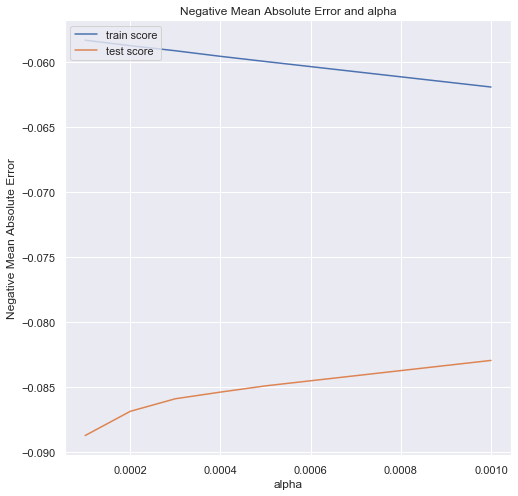

In [750]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(8,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [751]:
model_cv.best_score_

-0.08294206708451013

In [752]:
model_cv.best_params_

{'alpha': 0.001}

In [753]:
alpha=0.001

lasso=Lasso(alpha=alpha)
lasso.fit(x_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [754]:
lasso.coef_

array([-6.78683195e-03,  2.45033069e-02,  6.47835504e-02,  4.60017174e-02,
        5.16049935e-02,  1.80547693e-02,  6.16597677e-03,  2.75643947e-02,
        6.27790276e-03, -0.00000000e+00,  3.50491661e-02,  2.30981587e-02,
        2.96494448e-02,  4.40666649e-03,  9.42599903e-02,  8.82364499e-03,
       -8.68836939e-04,  8.09659775e-03,  4.75815202e-03, -5.86324427e-03,
       -1.48198731e-02,  4.32588657e-03,  1.34560636e-02,  5.31710235e-03,
        2.25705800e-02,  2.16491485e-02,  8.68860843e-03,  1.04742650e-02,
        3.52062446e-03,  3.15905416e-03,  1.17633493e-02,  6.97645724e-04,
        7.83112163e-04, -2.84709464e-03, -0.00000000e+00,  7.32781942e-03,
        8.20662302e-03,  2.48768812e-02,  0.00000000e+00,  1.16990888e-02,
       -0.00000000e+00,  3.58170602e-04,  1.94997115e-03,  2.25046743e-04,
        0.00000000e+00,  0.00000000e+00, -4.76947238e-03,  0.00000000e+00,
       -0.00000000e+00,  4.15755742e-03, -2.64648521e-03, -8.13411218e-04,
       -5.58820382e-03,  

In [755]:
# prediction
y_train_pred=lasso.predict(x_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred=lasso.predict(x_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))


0.9477991224203927
0.9071193096175336


In [756]:
main_coef=pd.Series(lasso.coef_,index=x_train.columns)
var_selected= sum(lasso.coef_!=0)
print("the num of feautes selected by lasso : ",var_selected)

the num of feautes selected by lasso :  190


In [757]:
main_features=pd.concat([main_coef.sort_values(ascending=False).head(10),main_coef.sort_values(ascending=False).tail(10)])
main_features

GrLivArea               0.094260
OverallQual             0.064784
YearBuilt               0.051605
OverallCond             0.046002
TotalBsmtSF             0.035049
2ndFlrSF                0.029649
BsmtFinSF1              0.027564
SaleCondition_Normal    0.027149
MSZoning_RL             0.024877
LotArea                 0.024503
BsmtQual_TA            -0.009990
Neighborhood_MeadowV   -0.010108
BsmtExposure_none      -0.011490
HeatingQC_TA           -0.011998
Functional_Maj2        -0.014663
KitchenAbvGr           -0.014820
BsmtQual_Gd            -0.015226
Heating_Grav           -0.018723
KitchenQual_TA         -0.020596
KitchenQual_Gd         -0.020896
dtype: float64

### Most signifcant features in predicting the price of house.


#### 1) GrLivArea

#### 2) MSZononig_RL

#### 3) OverallQual

#### 4) YearBuilt 

#### 5) MSZoning_RM

#### 6) MSZoning_FV

#### 7) OverallCond

#### 8) LotArea

#### 9) 2ndFlrSF

#### 10) TotalBsmtSF

### For Subjective Question

###### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

### Checking the effect on Lasso if the value of the alpha is doubled from before 

##### Taking alpha as 0.002

In [758]:
alphal=0.002

lasso1=Lasso(alpha=alphal)
lasso1.fit(x_train,y_train)

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [759]:
lasso1.coef_

array([-2.92861500e-03,  2.19897264e-02,  7.16902080e-02,  4.45456719e-02,
        5.25962194e-02,  2.09521760e-02,  6.40521490e-03,  2.87982035e-02,
        5.94418947e-03, -0.00000000e+00,  3.20443036e-02,  1.51658792e-02,
        1.45596890e-02,  7.44503217e-04,  1.07574390e-01,  9.13396858e-03,
       -0.00000000e+00,  5.96066199e-03,  4.47265688e-03, -3.98150722e-03,
       -1.48390689e-02,  4.57193019e-03,  1.41109998e-02,  2.38364478e-03,
        2.11886247e-02,  2.69557461e-02,  7.91966895e-03,  1.08058580e-02,
        1.21047287e-03,  7.71931730e-04,  1.04979375e-02,  0.00000000e+00,
        0.00000000e+00, -2.16500380e-03, -0.00000000e+00,  5.17819058e-03,
        5.79381153e-03,  2.33359286e-02, -0.00000000e+00,  1.12650605e-02,
       -0.00000000e+00,  9.87503844e-05,  1.35811980e-03,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -1.86197014e-03,  0.00000000e+00,
       -0.00000000e+00,  4.93687787e-03, -7.78808242e-04, -0.00000000e+00,
       -4.04514862e-03,  

In [760]:
# prediction
y_train_predl=lasso1.predict(x_train)
print(r2_score(y_true=y_train, y_pred=y_train_predl))
y_test_predl=lasso1.predict(x_test)
print(r2_score(y_true=y_test, y_pred=y_test_predl))

0.9432618738805428
0.9110727627094882


In [761]:
main_coefl=pd.Series(lasso1.coef_,index=x_train.columns)
var_selectedl= sum(lasso1.coef_!=0)
print("the num of feautes selected by lasso : ",var_selectedl)

the num of feautes selected by lasso :  147


In [762]:
main_featuresl=pd.concat([main_coefl.sort_values(ascending=False).head(10),main_coefl.sort_values(ascending=False).tail(10)])
main_featuresl

GrLivArea               0.107574
OverallQual             0.071690
YearBuilt               0.052596
OverallCond             0.044546
TotalBsmtSF             0.032044
BsmtFinSF1              0.028798
GarageArea              0.026956
MSZoning_RL             0.023336
LotArea                 0.021990
SaleCondition_Normal    0.021674
Neighborhood_MeadowV   -0.008394
Functional_Sev         -0.008578
BldgType_Twnhs         -0.009204
BsmtExposure_none      -0.009658
KitchenQual_TA         -0.010523
HeatingQC_TA           -0.011133
KitchenQual_Gd         -0.011161
Functional_Maj2        -0.012632
KitchenAbvGr           -0.014839
Heating_Grav           -0.017340
dtype: float64

Not much change in the R2 score but features selected is 140 and top features also changed 

### For Subjective Question

###### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

##### Removing top 5 features then doing ridge and lasso

In [763]:
X=X.drop(['GrLivArea', 'OverallQual', 'YearBuilt','MSZoning_RL'          
,'MSZoning_RM'], axis=1)

In [764]:
X.head()

,MSSubClass,LotArea,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.072378,-0.199658,-0.520907,0.882711,0.540428,0.636315,-0.28711,-0.944420,-0.480482,-0.819546,...,-0.058844,-0.058844,-0.29775,-0.045549,0.386119,-0.052613,-0.091382,-0.118304,0.464332,-0.301852
1,-0.874587,-0.083029,2.171582,-0.425555,-0.572192,1.273400,-0.28711,-0.638980,0.637354,0.300381,...,-0.058844,-0.058844,-0.29775,-0.045549,0.386119,-0.052613,-0.091382,-0.118304,0.464332,-0.301852
2,0.072378,0.084309,-0.520907,0.834257,0.347422,0.121026,-0.28711,-0.297069,-0.272849,-0.643006,...,-0.058844,-0.058844,-0.29775,-0.045549,0.386119,-0.052613,-0.091382,-0.118304,0.464332,-0.301852
3,0.309120,-0.088100,-0.520907,-0.716281,-0.572192,-0.511374,-0.28711,-0.055451,-0.838219,-0.529910,...,-0.058844,-0.058844,-0.29775,-0.045549,0.386119,-0.052613,-0.091382,-0.118304,-2.153632,-0.301852
4,0.072378,0.389574,-0.520907,0.737348,1.414628,0.516862,-0.28711,-0.169422,0.357182,-0.022357,...,-0.058844,-0.058844,-0.29775,-0.045549,0.386119,-0.052613,-0.091382,-0.118304,0.464332,-0.301852


### Scaling the features.

In [765]:
from sklearn.preprocessing import scale
kols=X.columns
X=pd.DataFrame(scale(X))
X.columns=kols
X.columns

Index(['MSSubClass', 'LotArea', 'OverallCond', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=251)

###### Train-Test Splitting

In [766]:
## Split into train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

### Model Building and Evaluations.

### Ridge and Lasso Regression.

In [767]:
## list of alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge=Ridge()
## Cross validation
folds=5
model_cv= GridSearchCV(estimator=ridge, param_grid=params ,scoring='neg_mean_absolute_error',
                       cv=folds,return_train_score=True,verbose=1)
model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [768]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results=cv_results[cv_results['param_alpha'] <=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014191,0.001938,0.002597,0.000488,0.0001,{'alpha': 0.0001},-0.100605,-0.101773,-0.086443,-0.100058,...,-0.097372,0.005601,27,-0.063147,-0.063597,-0.066701,-0.062881,-0.063530,-0.063971,0.001389
1,0.016643,0.002239,0.003035,0.000641,0.001,{'alpha': 0.001},-0.100604,-0.101772,-0.086443,-0.100057,...,-0.097371,0.005601,26,-0.063148,-0.063597,-0.066701,-0.062881,-0.063530,-0.063971,0.001389
2,0.014626,0.001679,0.002625,0.000514,0.01,{'alpha': 0.01},-0.100599,-0.101757,-0.086434,-0.100045,...,-0.097358,0.005599,25,-0.063148,-0.063597,-0.066701,-0.062881,-0.063531,-0.063972,0.001390
3,0.015048,0.001338,0.002633,0.000525,0.05,{'alpha': 0.05},-0.100573,-0.101693,-0.086396,-0.099992,...,-0.097304,0.005594,24,-0.063150,-0.063598,-0.066703,-0.062881,-0.063534,-0.063973,0.001390
4,0.015659,0.000706,0.003027,0.000060,0.1,{'alpha': 0.1},-0.100542,-0.101615,-0.086349,-0.099929,...,-0.097239,0.005589,23,-0.063153,-0.063598,-0.066705,-0.062881,-0.063538,-0.063975,0.001390


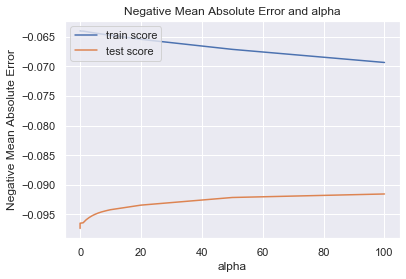

In [769]:
## plotting mean test and train score for aplha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [770]:
model_cv.best_score_

-0.09155225414457599

In [771]:
model_cv.best_params_

{'alpha': 100}

In [772]:
## Optimal value for alpha is 50 for ridge
alpha=50
ridge=Ridge(alpha)
ridge.fit(x_train,y_train)
ridge.coef_

array([-7.55241615e-03,  2.51383790e-02,  3.56015532e-02,  3.02772052e-02,
        6.24686563e-03,  3.47909075e-02,  6.88978105e-03,  9.83656072e-03,
        4.27240147e-02,  7.24756412e-02,  6.12142306e-02,  7.22789120e-03,
        1.37395125e-02,  9.06534127e-04,  2.74772071e-02,  2.28210682e-02,
        6.60397521e-03, -2.00428105e-02,  1.83644424e-02,  1.01396240e-02,
       -3.73928223e-03,  2.27338368e-02,  2.66957213e-02,  9.21705113e-03,
        1.90108178e-03,  1.49733406e-03,  3.25197264e-03,  1.13857891e-02,
        3.39668307e-03,  4.43914666e-04,  2.92002981e-03, -1.04775560e-03,
        7.47545234e-03,  3.86679591e-03,  1.91596616e-02,  5.68933828e-03,
        3.53457225e-03,  4.43079349e-04, -2.24553923e-03, -2.33584435e-03,
       -1.11909266e-03, -9.07874226e-03,  2.46954101e-05, -4.47925587e-03,
        4.36487162e-03, -8.89528556e-03, -2.31090896e-03, -1.15284115e-02,
        6.55826653e-03, -1.17334720e-02, -1.89149315e-03, -4.85541848e-03,
       -5.90185012e-03, -

In [773]:
## predictions
y_train_pred=ridge.predict(x_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred=ridge.predict(x_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))


0.9417729938289352
0.8712272448371639


#### r2 score is good for both train and test data  so clearly no overfitting.


### LASSO regression.

In [774]:
params = {'alpha': [0.0001,0.0002,0.0003,0.0004,0.0005,0.001, ]}


lasso= Lasso()
model_cv= GridSearchCV(estimator=lasso, param_grid=params , scoring='neg_mean_absolute_error',
                       cv=folds, return_train_score=True, verbose=1)
model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    4.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [775]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.294039,0.087829,0.003131,0.000777,0.0001,{'alpha': 0.0001},-0.098395,-0.098719,-0.084258,-0.097595,...,-0.094932,0.005439,6,-0.063396,-0.063948,-0.066960,-0.063080,-0.064068,-0.064291,0.001383
1,0.234579,0.107448,0.003218,0.000441,0.0002,{'alpha': 0.0002},-0.096664,-0.096803,-0.082724,-0.095822,...,-0.093449,0.005393,5,-0.063788,-0.064391,-0.067397,-0.063447,-0.064718,-0.064748,0.001397
2,0.146961,0.011695,0.002198,0.000980,0.0003,{'alpha': 0.0003},-0.095226,-0.094928,-0.081578,-0.095051,...,-0.092303,0.005365,4,-0.064383,-0.064821,-0.067783,-0.063821,-0.065243,-0.065210,0.001370
3,0.142863,0.044143,0.003043,0.000639,0.0004,{'alpha': 0.0004},-0.093786,-0.093947,-0.081045,-0.094607,...,-0.091537,0.005254,3,-0.064875,-0.065245,-0.068129,-0.064222,-0.065830,-0.065660,0.001340
4,0.085646,0.027549,0.003027,0.000585,0.0005,{'alpha': 0.0005},-0.092493,-0.093091,-0.080183,-0.094252,...,-0.090815,0.005355,2,-0.065320,-0.065603,-0.068473,-0.064593,-0.066324,-0.066063,0.001326


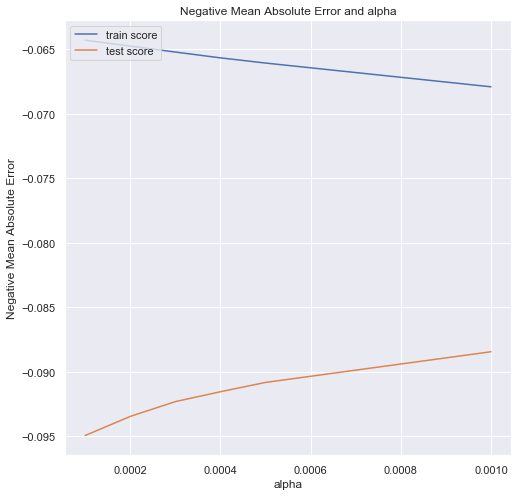

In [776]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(8,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [777]:
model_cv.best_score_

-0.08843811422416607

In [778]:
model_cv.best_params_

{'alpha': 0.001}

In [779]:
alpha=0.001

lasso=Lasso(alpha=alpha)
lasso.fit(x_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [780]:
lasso.coef_

array([-2.79190975e-03,  2.27113458e-02,  3.72511665e-02,  2.98125097e-02,
        2.24833497e-03,  2.54958099e-02,  0.00000000e+00,  0.00000000e+00,
        4.38080266e-02,  1.03463725e-01,  9.54115162e-02,  8.75057143e-03,
        1.28886134e-02,  0.00000000e+00,  2.32578372e-02,  1.98266377e-02,
        1.55530106e-03, -2.14558865e-02,  5.57231075e-03,  6.31266610e-03,
        0.00000000e+00,  2.24581241e-02,  2.45334676e-02,  8.20195536e-03,
        5.51226887e-04,  0.00000000e+00,  1.67284776e-03,  1.05751395e-02,
        4.11661728e-04,  0.00000000e+00,  1.47343374e-03, -0.00000000e+00,
        6.93853633e-03,  3.13147959e-03,  1.69829683e-02,  1.95549659e-03,
        0.00000000e+00,  1.90241559e-04, -1.18465885e-03, -1.73992857e-03,
        0.00000000e+00, -5.97773095e-03,  0.00000000e+00, -2.51700235e-03,
        3.41886282e-03, -6.92993668e-03, -0.00000000e+00, -1.01922322e-02,
        3.76144553e-03, -9.84067837e-03, -9.62295263e-04, -2.52811593e-03,
       -3.92798951e-03,  

In [781]:
# prediction
y_train_pred=lasso.predict(x_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred=lasso.predict(x_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))


0.9406107318603759
0.8804591762814254


### r2 score is good for both train and test data  so clearly no overfitting.

In [782]:
main_coef=pd.Series(lasso.coef_,index=x_train.columns)
var_selected= sum(lasso.coef_!=0)
print("the num of feautes selected by lasso : ",var_selected)

the num of feautes selected by lasso :  175


In [783]:
main_features=pd.concat([main_coef.sort_values(ascending=False).head(10),main_coef.sort_values(ascending=False).tail(10)])
main_features

1stFlrSF                 0.103464
2ndFlrSF                 0.095412
TotalBsmtSF              0.043808
OverallCond              0.037251
SaleCondition_Partial    0.035055
Functional_Typ           0.030068
YearRemodAdd             0.029813
SaleCondition_Normal     0.029325
CentralAir_Y             0.026168
BsmtFinSF1               0.025496
Functional_Maj2         -0.014563
BsmtQual_TA             -0.015715
Neighborhood_OldTown    -0.016438
HouseStyle_1Story       -0.017379
Neighborhood_Edwards    -0.017618
KitchenAbvGr            -0.021456
Neighborhood_IDOTRR     -0.023038
Neighborhood_MeadowV    -0.026863
KitchenQual_Gd          -0.037191
KitchenQual_TA          -0.039993
dtype: float64

As a result of removing top 5 features we can see here the top features also changed 

## So the top five features of the new model are as follows:-

#### 1:-1stFlrSF
#### 2:-2ndFlrSF
#### 3:-TotalBsmtSF
#### 4:-OverallCond
#### 5:-SaleCondition_Partial 